# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from matplotlib import cm
from matplotlib.colors import Normalize

colors = sns.color_palette("hls", 8)   # Colors
title_size = 16                        # Size title
axis_size = 14                         # Size axis label
value_size = 10                        # Size values on axis
legend_size = 12                       # Size legend

## Exercise 02.1
### Assignment
Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks $N$.

### Resolution

For both samplings I generated $M = 10^6$ pseudo-random numbers in $[0, 1)$ divided into $N=100$ blocks. To evaluate functions used in the exercise, in `FunzioneBase.h` I used the virtual method `Eval` of the parent class `FunzioneBase` that assumes speficic expression in the derivated classes (`Coseno` and `Pol2`). 

**MonteCarlo integration with uniform distribution**

Given an integral $I=\int_a^b f(x)dx$, considering a partition of the interval $[a,b]$, if the following holds:

$$I=\int_a^b f(x)dx=\lim_{N\to+\infty}\sum_{i=1}^{N}\Delta x \cdot f(x_i)=(b-a)\lim_{N\to+\infty}\frac{1}{N}\sum_{i=1}^{N}f(x_i)=(b-a)\left<f\right>_{[a,b]}\simeq(b-a)\frac{1}{N}\sum_{i=1}^{N}f(x_i)$$

where an estimation of the arithmetic mean $\left<f\right>_{[a,b]}$ can be obtained by considering random variables $x_i$ uniformly distributed in the considered interval $[a,b]$.

**Importance Sampling**

Generally, an integral of the form $I=\int_{\Omega}g(x)p(x) \ dx$ with $p(x) \geq0 \ \forall x \in \Omega$ and $\int_{\Omega}p(x)dx=1$ can be evalueted using $G_{N}=\frac{1}{N}\sum_{i=1}^{N}g(x_i)$ with $x_i$ sampled from the distribution $p(x)$. This allows for greater sampling of the areas where the function is significantly different from zero.

Importance sampling consists find $p(x)$ similar to the function being integrated $\int f(x) dx = \int \left[ \frac{f(x)}{p(x)}\right]p(x) \ dx $ with $p(x)$ normalized and non negative on integration interval. Using a $p(x)$ similar to the integrand, it is possible to significantly reduce the variance of the estimates of the integral with the same number of samples respect to use uniform sampling. In order to find $p(x)$ I expanded the integrand to $x=1$:

$$f(x) \approx f(1) + f'(1)(x-1)  = \frac{\pi^2}{4}(1-x)$$

that is non-negative in $[0, 1]$. I calculated the normalization $\frac{\pi^2}{4}\int_0^1 1-x \ dx = \frac{\pi^2}{8}$ obtaining the probability distribution $p(x) = 2(1-x)$. Using the method of comulative function:

$$F(x) = \int_0^x p(x) \ dx = 2 (x-\frac{1}{2}x^2) =y \to x = \sqrt{1-y} +1$$

with $y$ uniformly distributed between $[0, 1)$.

The following plot shows the integrand and the distribution used in the importance sampling technique.

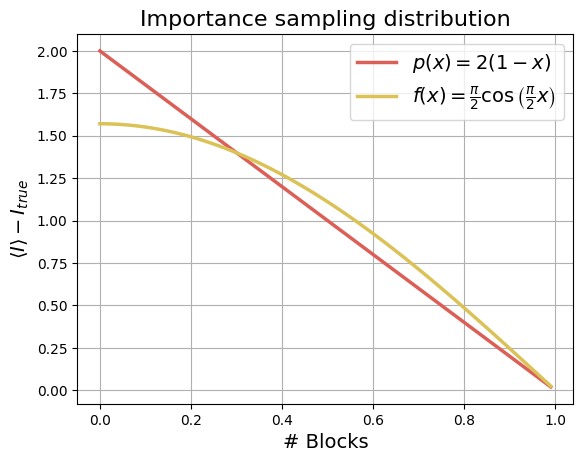

In [17]:
# Define the probability distribution p(x)
def p(x):
    return 2*(1-x)

# Define the function f(x)
def f(x):
    return (np.pi / 2) * np.cos(np.pi / 2 * x)

x = np.arange(0, 1, 0.01)

# Plot 
plt.plot(x, p(x), color = colors[0], linewidth=2.5, label=r'$p(x) = 2(1-x)$')
plt.plot(x, f(x), color = colors[1], linewidth=2.5, label=r'$f(x)=\frac{\pi}{2}\cos{\left(\frac{\pi}{2}x\right)}$')
plt.title("Importance sampling distribution", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'$\left< I \right>-I_{true}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)
plt.show()

As it's possible to see in the plot, Importance Sampling technique allows to obtain a more precise and accurate values with the same number of extractions.

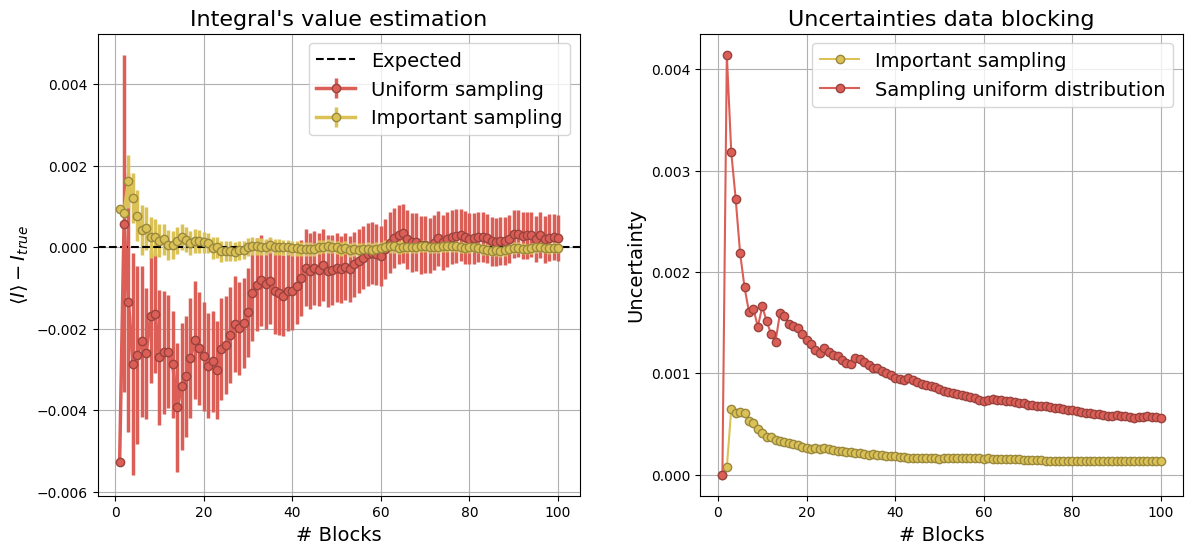

In [18]:
# Data import
df = pd.read_csv('../E02/e02_1/data.dat', delimiter=' ') 

plt.figure(figsize=(14, 6))

# Plot integral sampling a uniform distribution
plt.subplot(1, 2, 1)
plt.errorbar(df['blocchi'], df['mean'] - 1., yerr = df['devstd'], color = colors[0], linewidth=2.5, marker='o', mec=tuple(np.array(colors[0]) * 0.7), label = "Uniform sampling")
plt.errorbar(df['blocchi'], df['mean_imp'] - 1., yerr = df['devstd_imp'], color = colors[1], linewidth=2.5, marker='o', mec=tuple(np.array(colors[1]) * 0.7), label = "Important sampling")
plt.axhline(0, color='black', linestyle='--', label="Expected")      # Line at y = 0
plt.title("Integral's value estimation", fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'$\left< I \right>-I_{true}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)

# Plot errors
plt.subplot(1, 2, 2)
plt.plot(df['blocchi'], df['devstd_imp'], color=colors[1], label='Important sampling', linewidth=1.5, marker='o', mec=tuple(np.array(colors[1]) * 0.7))
plt.plot(df['blocchi'], df['devstd'], color=colors[0], label='Sampling uniform distribution', linewidth=1.5, marker='o', mec=tuple(np.array(colors[0]) * 0.7))
plt.title('Uncertainties data blocking', fontsize=title_size)
plt.xlabel(r'# Blocks', fontsize=axis_size)
plt.ylabel(r'Uncertainty', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=axis_size)
plt.grid(True)


# Show plots
plt.subplots_adjust(wspace=0.25)
plt.show()

## Exercise 02.2 
### Assignment
3D Random Walks (RW) on a cubic lattice and in the continuum: Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### Exercise 02.2 - Resolution

I simulated $M=10^4$ random walks, divided into $N = 100$ blocks, each consisting of $n = 100$ discrete and continuous steps. At each step, the walker moves with a step length of $a=1$.

For the discrete random walk, at each step, using `RW3d_d` function I uniformly generated a number in the range $[1,6]$, which indicates a specific direction (positive or negative) along one of the three axes along which the walker moves and I updated consequentially the position of the walker.
 
For the continuous random walk, at each step, I needed to sample the two angles of the spherical coordinates. When transitioning from Cartesian coordinates to spherical coordinates, it is worth noting that $d\tau =  dx \ dy \ dz \to d\tau = \rho^2\sin(\theta) \ d\rho \ d\theta  \ d\phi$. Since $\rho = a$ is fixed, only the angles need to be sampled. Using `RW3d_c` function I uniformly generated $\phi\in[0, 2\pi)$ and  for $\theta \in [0, \pi]$ I used the inverse cumulative function method with $p(\theta) = \sin(\theta)$, normalized as $\int_0^{\pi} \sin(t) \ dt = 2 \to p(\theta) = \frac{1}{2} \sin(\theta)$. The cumulative function is 

$$F(x) = \int_0^{\theta} \sin(t) \ dt= \frac{1}{2} - \frac{1}{2}\cos(\theta) $$

which when inverted gives 

$$\theta = \arccos{\left(1-2y \right)}$$

with $y\in[0,1)$. After generating the angles, I updated the position of the walker.
As can be seen in the plot, this method samples the entire solid angle uniformly.

/tmp/ipykernel_10204/2360362937.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(df["x_c"][:points], df["y_c"][:points], df["z_c"][:points], c=colors[0], marker='o', edgecolors=tuple(np.array(colors[0]) * 0.7))


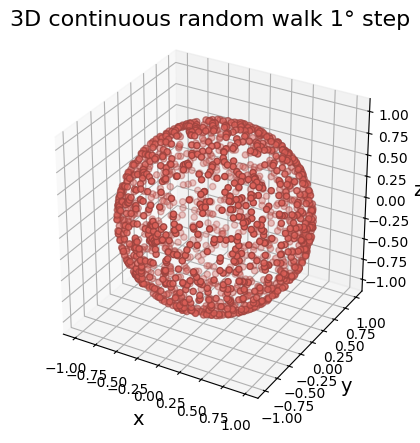

In [19]:
# Data import
df = pd.read_csv('../E02/e02_2/first_step.dat', delimiter=' ') 

fig = plt.figure(figsize=(8, 8))

# 3D discrete RW
points = 1500        # Number of points
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df["x_c"][:points], df["y_c"][:points], df["z_c"][:points], c=colors[0], marker='o', edgecolors=tuple(np.array(colors[0]) * 0.7))
ax1.set_xlabel('x', fontsize=axis_size)
ax1.set_ylabel('y', fontsize=axis_size)
ax1.set_zlabel('z', fontsize=axis_size)
ax1.set_title(r"3D continuous random walk 1° step", fontsize=title_size)
ax1.set_box_aspect([1,1,1])
ax1.tick_params(axis='both', which='major', labelsize=value_size)

plt.tight_layout()
plt.show()


For each step $i$ and in each block, I computed the mean of $\vec{r}^{2}_{i}$, and then took its root to obtain the mean square displacement $\sqrt{\left<|\vec{r}|^2\right>_{RW}}$. I used data blocking for analysis.

In the first column, I plotted the mean square displacement and its fit using the function $k\sqrt{N}$ with $N$ the number of steps, where $k$ is shown to be approximately equal to $a$ in both cases (I experimented with different step lengths). To highlight the uncertainty of the random walks, I plotted in the second column the difference between the mean squared displacement and the fit function. In both cases, they are found to be compatible, highlighting the diffusive nature of this process. Indeed in a diffusion process $\left<|\vec{r}(t)|^2\right> = 2Dt \to \sqrt{\left<|\vec{r}(t)|^2\right>} = \sqrt{2Dt}$ with $D$ diffusion coefficient and $t = N$. Therefore $k= \sqrt{2D}$.

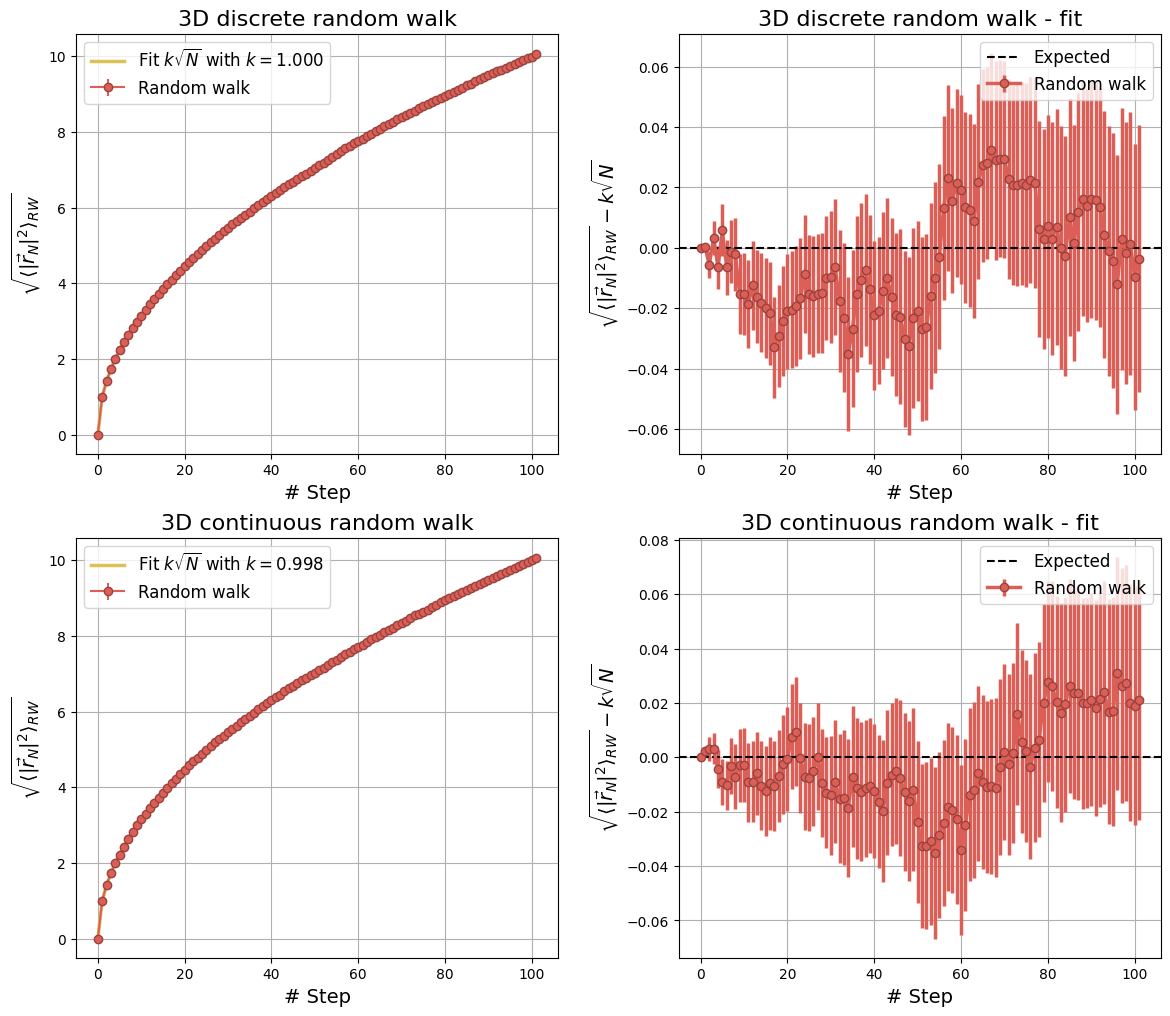

In [20]:
# Data
df = pd.read_csv('../E02/e02_2/steps.dat', delimiter=' ') 

# Fit 
def f_fit(x, k):
    return k * np.sqrt(x) # k * x^0.5

# Plot
plt.figure(figsize=(14, 12))

# Plot 3D discrete random walk
parametri_fit, covarianza = curve_fit(f_fit, df['step'], df['mean_d'], p0=1)
plt.subplot(2, 2, 1)
plt.plot(df['step'], f_fit(df['step'], *parametri_fit), color=colors[1], label=r"Fit $k\sqrt{{N}}$ with $k = {:.3f}$".format(parametri_fit[0]), linewidth=2.5)
plt.errorbar(df['step'], df['mean_d'], yerr = df['devstd_d'], color = colors[0], marker='o', mec=tuple(np.array(colors[0]) * 0.7), label="Random walk")
plt.title("3D discrete random walk", fontsize=title_size)
plt.xlabel(r'# Step', fontsize=axis_size)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

# Plot 3D discrete random walk - fit
plt.subplot(2, 2, 2)
plt.errorbar(df['step'], df['mean_d']-f_fit(df['step'], *parametri_fit), yerr = df['devstd_d'], color = colors[0], linewidth=2.5, marker='o', mec=tuple(np.array(colors[0]) * 0.7), label="Random walk")
plt.axhline(0, color='black', linestyle='--', label="Expected")      # Line at y = 0
plt.title("3D discrete random walk - fit", fontsize=title_size)
plt.xlabel(r'# Step', fontsize=axis_size)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - k\sqrt{N}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

# Plot 3D continuous random walk
parametri_fit, covarianza = curve_fit(f_fit, df['step'], df['mean_c'], p0=1)
plt.subplot(2, 2, 3)
plt.plot(df['step'], f_fit(df['step'], *parametri_fit), color=colors[1], label=r"Fit $k\sqrt{{N}}$ with $k = {:.3f}$".format(parametri_fit[0]), linewidth=2.5)
plt.errorbar(df['step'], df['mean_c'], yerr = df['devstd_c'], color = colors[0], marker='o', mec=tuple(np.array(colors[0]) * 0.7), label="Random walk")
plt.title("3D continuous random walk", fontsize=title_size)
plt.xlabel(r'# Step', fontsize=axis_size)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} $', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

# Plot 3D continuous random walk - fit
plt.subplot(2, 2, 4)
plt.errorbar(df['step'], df['mean_c']-f_fit(df['step'], *parametri_fit), yerr = df['devstd_d'], color = colors[0], linewidth=2.5, marker='o', mec=tuple(np.array(colors[0]) * 0.7), label="Random walk")
plt.axhline(0, color='black', linestyle='--', label="Expected")      # Line at y = 0
plt.title("3D continuous random walk - fit", fontsize=title_size)
plt.xlabel(r'# Step', fontsize=axis_size)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}-k\sqrt{N}$', fontsize=axis_size)
plt.tick_params(axis='both', which='major', labelsize=value_size)
plt.legend(fontsize=legend_size)
plt.grid(True)

plt.subplots_adjust(wspace=0.25)

The following plot shows one simulation of 3D discrete and continuous random walk for $100$ steps. 

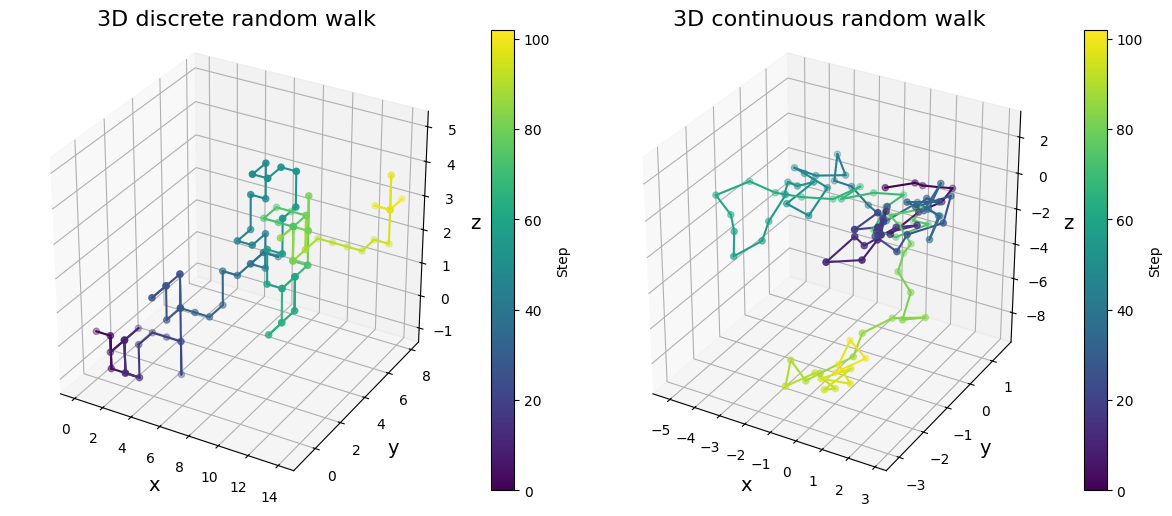

In [21]:
# Data import
df = pd.read_csv('../E02/e02_2/rw.dat', delimiter=' ') 

# Colors
norm = Normalize(vmin=0, vmax=len(df))
colors = cm.viridis(norm(range(len(df))))

fig = plt.figure(figsize=(12, 5))

# 3D discrete RW
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df["x_d"], df["y_d"], df["z_d"], c=colors, marker='o')

for i in range(len(df)-1):
    ax1.plot(df["x_d"].iloc[i:i+2], df["y_d"].iloc[i:i+2], df["z_d"].iloc[i:i+2], color=colors[i])

ax1.set_xlabel('x', fontsize=axis_size)
ax1.set_ylabel('y', fontsize=axis_size)
ax1.set_zlabel('z', fontsize=axis_size)
ax1.set_title(r"3D discrete random walk", fontsize=title_size)
ax1.set_box_aspect([1,1,1])
ax1.tick_params(axis='both', which='major', labelsize=value_size)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df["x_c"], df["y_c"], df["z_c"], c=colors, marker='o')

# 3D continuous RW
for i in range(len(df)-1):
    ax2.plot(df["x_c"].iloc[i:i+2], df["y_c"].iloc[i:i+2], df["z_c"].iloc[i:i+2], color=colors[i])

ax2.set_xlabel('x', fontsize=axis_size)
ax2.set_ylabel('y', fontsize=axis_size)
ax2.set_zlabel('z', fontsize=axis_size)
ax2.set_title(r"3D continuous random walk", fontsize=title_size)
ax2.set_box_aspect([1,1,1])
ax2.tick_params(axis='both', which='major', labelsize=value_size)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax1, label='Step')
plt.colorbar(sm, ax=ax2, label='Step')
plt.tight_layout()
plt.show()
